<a href="https://colab.research.google.com/github/AHajibalayev/Statistical-Machine-Learning/blob/main/Regresion_Ahmadagha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt
import numpy.linalg as la

# Linear Regression
------------------
We are going to perform linear regression and fit a polynomial to a set of points

We consider a linear regression problem of the form
$$
y = \mathbf{x}^T θ +ϵ, \; ϵ \sim \mathcal{N}(0, σ^2)
$$
where $\mathbf{x}\in \mathcal{R}^D$ are inputs and $y \in \mathcal{R}$ are noisy observations.

We are interested in finding a good estimate of the parameters $\theta$

## The data
We will generate the data to work with

The data will be split into a training set and a test set

In [ ]:
# First we generate the data to work with
Ntrain = 20


In [ ]:
# generate N random sample points btw [-5, 5] uniformly
# generate the y's with an additive Gaussian noise
mu, sigma = 0, 0.2
eps = np.random.normal(mu, sigma, Ntrain).reshape(-1,1)

xtrain = np.random.uniform(-5, 5, size=(1, Ntrain)).reshape(-1,1)
ytrain = - np.sin(xtrain/5) + np.cos(xtrain) + eps

Text(0.5, 1.0, 'training data')

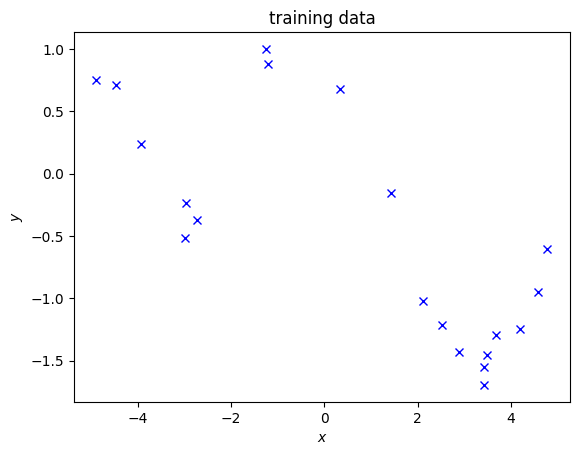

In [ ]:
# plot the training data
plt.figure()
plt.plot(xtrain, ytrain, 'xb')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("training data")

# 1. Maximum likelihood estimate
From the lecture we know that the ML estilmator for $θ$ is given by
$$
θ_{ML} = (X^TX)^{-1}X^T y
$$
where $X \in \mathcal{R}^{N×D}$ and $y \in \mathcal{R}^N$.


In [ ]:
## EDIT THIS FUNCTION
def max_likelihood_estimate(X,y):
    # X : N x D matrix of training inputs
    # y: N x 1 vector of training targets
    # returns: maximum likelihhod estimated parameters (D x 1)
    theta_ml = np.dot(la.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta_ml

Before we can test our function we need to decide which polynomial we want to fit.

Let's try a linear function, that is $M=1$
$$
f(x_i) = θ_0 + θ_1 x_i
$$

In [ ]:
# Define the matrix X
# We need the define the data matrix X of size N X 2 (we addd a column of 1)

def make_data_matrix(x):
  # x : N x 1 input vetcor
  # returns data matrix XX of size N x 2
    N = x.shape[0]            # Number of samples
    ones = np.ones((N, 1))    # Column of ones for the bias term
    X = np.hstack((ones, x))
    return X

In [ ]:
# Apply the functions and estimate the parameters of the model
XX_train = make_data_matrix(xtrain)
theta_ml = max_likelihood_estimate(XX_train, ytrain)
print("estimated parameters :\n", theta_ml)

estimated parameters :
 [[-0.34609135]
 [-0.20646353]]


Now let's make prediction with our estimation

In [ ]:
## ## EDIT THIS FUNCTION
def predict_with_estimate(Xtest, theta):

  # Xtest : K x D matrix of test inputs
  # theta: D x 1 vector of parameters
  # returns: prediction of f(Xtest): K x 1 vector

  # to be completed
    prediction = np.dot(Xtest, theta)

    return prediction

In [ ]:
# predict the function values at test points using the ML estimator
# first let's define test points
xtest = np.linspace(-6, 6, 100).reshape(-1,1) # generate 100 points uniformly spaced
ytest = - np.sin(xtest/5) + np.cos(xtest) + np.random.normal(mu, sigma, 100).reshape(-1,1)

XX_test = make_data_matrix(xtest)
ml_pred = predict_with_estimate(XX_test, theta_ml)

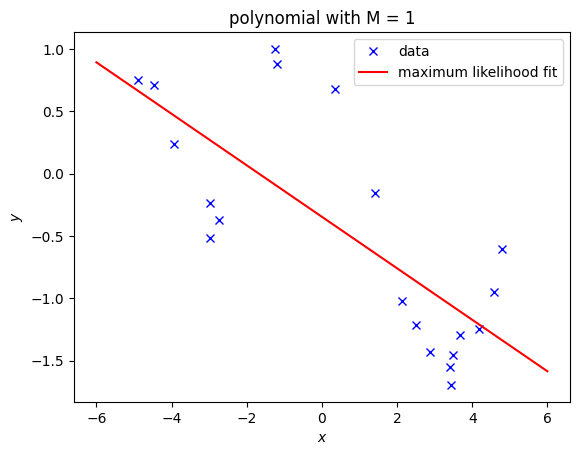

In [ ]:
# plot the test data and the estimated polynomial
plt.figure
plt.plot(xtrain, ytrain, 'xb')
plt.plot(xtest, ml_pred, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("polynomial with M = 1")
plt.legend(["data", "maximum likelihood fit"])

## Question
What can you say about this polynomial fit?

**Answer**: In my opinion, in terms of linear regression, this is the most suitable line to fit this given data. The best fit line is the line that the error between the actual values and predicted values should be minumum. But linear regression is not always the best line to describe the function.

# 2. Polynomial Regression

One class of functions that is covered by linear regression is the family of polynomials because we can write a polynomial of degree K
as
$$
\sum_{k=0}^K \theta_k x^k = \phi(x)^T θ, \qquad \phi(x) = \begin{bmatrix} x^0 \\ x^1 \\ \vdots \\x^K \end{bmatrix}
$$
Here, ϕ(x) is a nonlinear feature transformation of the inputs x∈ℝ.

Let us start by computing the feature matrix $\Phi = [\phi(x_1), \ldots, \phi(x_n)]^T \in \mathcal{R}^{N × K+1}$

In [ ]:
## EDIT THIS FUNCTION
def poly_features(X, K):

    # X: inputs of size N x 1
    # K: degree of the polynomial
    # returns the feature matrix Phi (N x (K+1))

    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K+1))

    # Compute the feature matrix in stages
    ## <--- EDIT THIS LINE
    for i in range(K+1):
        Phi[:, i] = X**i
    return Phi

With this feature matrix we get the maximum likelihood estimator as
$$
θ_{ML} = (Φ^T Φ)^{-1}Φ^T y
$$
For reasons of numerical stability, we often add a small diagonal "jitter" $κ >0$ to $Φ^TΦ$ so that we can invert the matrix without significant problems, and so the maximum likelihood estimate becomes
$$
θ_{ML} = (Φ^T Φ + κ I)^{-1}Φ^T y
$$

In [ ]:
## EDIT THIS FUNCTION
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1

    kappa = 1e-08 # 'jitter' term; good for numerical stability

    D = Phi.shape[1]

    # maximum likelihood estimate
    theta_ml = np.dot(la.inv(np.dot(Phi.T, Phi) + np.dot(kappa, np.identity(D))), np.dot(Phi.T, y))

    return theta_ml

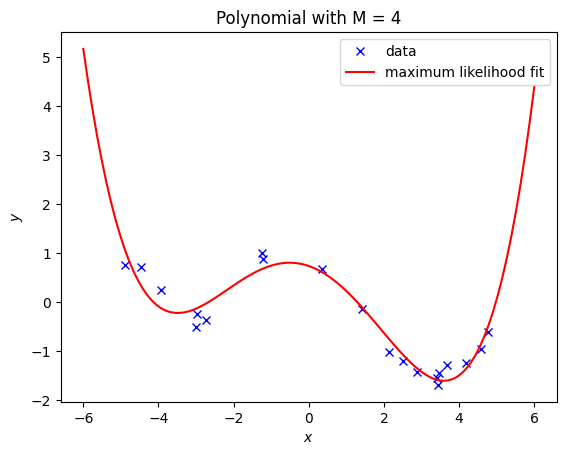

In [ ]:
# test
K = 4
# find best estimate of parameters
XX_train = poly_features(xtrain, K)
theta_ml = nonlinear_features_maximum_likelihood(XX_train, ytrain)
# print(XX_train)
# print(theta_ml)

# # Apply to test data
XX_test = poly_features(xtest, K)
ml_pred = predict_with_estimate(XX_test, theta_ml)

# plot
plt.figure
plt.plot(xtrain, ytrain, 'xb')
plt.plot(xtest, ml_pred, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Polynomial with M = 4")
plt.legend(["data", "maximum likelihood fit"])

# 3. Quality of prediction
1. try out different degrees of polynomials

2. Which one looks the best?

Let's be more systematic in assessing the quality of the fit.
For this we will use the root-mean-squared-error (RMSE) between the $y$-values predicted and the ground truth $y$ values:
$$
RMSE = \sqrt{\frac{1}{N}\sum_{n=1}^N (y_n - y_n^{pred})^2}
$$

Write a function that computes the RMSE

In [ ]:
## EDIT THIS FUNCtION
def RMSE(y, ypred):
  rmse = np.sqrt(np.mean((y - ypred) ** 2))
  return rmse

Now compute the RMSE for different degrees of the polynomial

The RMSE on the training data is somewhat misleading, because we are interested in the generalization performance of the model. Therefore, we are going to compute the RMSE on the test set and use this to choose a good polynomial degree.

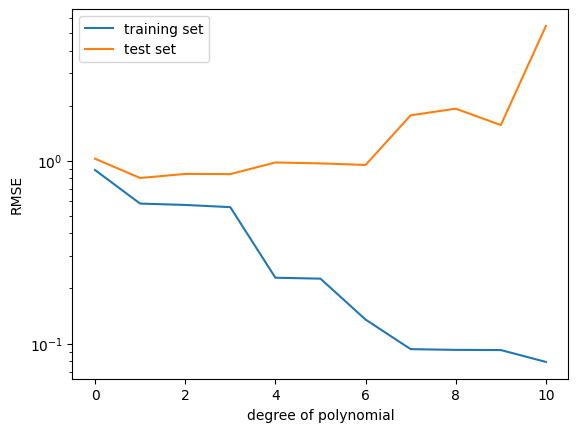

In [ ]:
## EDIT THIS CELL
K_max = 10
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(K_max+1):

    # feature matrix
    Phi = poly_features(xtrain, k)

    # maximum likelihood estimate
    theta_ml = nonlinear_features_maximum_likelihood(Phi, ytrain)

    # predict y-values of training set
    ypred_train = predict_with_estimate(Phi, theta_ml)

    # RMSE on training set
    rmse_train[k] = RMSE(ytrain, ypred_train)

    # feature matrix for test inputs
    Phi_test = poly_features(xtest, k)

    # prediction (test set)
    ypred_test = predict_with_estimate(Phi_test, theta_ml)

    # RMSE on test set
    rmse_test[k] = RMSE(ytest, ypred_test)


plt.figure()
plt.semilogy(rmse_train) # this plots the RMSE on a logarithmic scale
plt.semilogy(rmse_test) # this plots the RMSE on a logarithmic scale
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"]);



## Questions:
1. What do you observe now?

**Answer:** As the degree of the polynomial increases, the RMSE for the training set generally decreases, suggesting that the model is fitting the training data better with higher degree polynomials while the RMSE for testing set increases.

2. Why does the RMSE for the test set not always go down?

**Answer:** The RMSE for the test set initially decreases and then starts to increase. This could indicate overfitting, where the model fits the training data too well, capturing noise instead of the underlying data pattern, which does not generalize well to new, unseen data.

3. Which polynomial degree would you choose now?

**Answer:** According to these graph that I plotted below, the best polynomial degree I choose is 1 which is linear regression because the RMSE of linear regression is minimum. It means that the model fits well in both training and testing set while comparing to the other degrees of polynomial.

4. Plot the fit for the "best" polynomial degree.



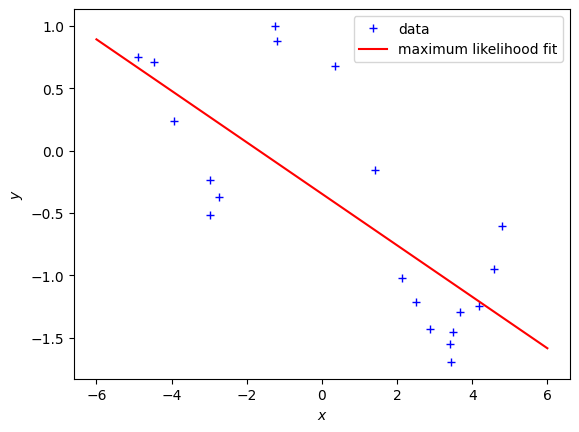

In [ ]:
## WRITE THE PLOTTING CODE HERE
k_best = 1 ## <--- EDIT THIS LINE

# Apply to test data
XX_train = poly_features(xtrain, k_best)
theta_ml = nonlinear_features_maximum_likelihood(XX_train, ytrain)

# # Apply to test data
XX_test = poly_features(xtest, k_best)
ml_pred = predict_with_estimate(XX_test, theta_ml)

# plot
plt.figure()
plt.plot(xtrain, ytrain, '+b')
plt.plot(xtest, ml_pred, '-r')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"])

## Question
If you did not have a designated test set, what could you do to estimate the generalization error (purely using the training set)?


**Answers:** If we did not have a designated test set, we can estimate the generalization error by cross-validation.  The most common method is k-fold cross-validation. The training data is divided into 'k' subsets, and the model is trained 'k' times, each time using a different subset as the validation set and the remaining data as the training set. The average error across all 'k' trials is used as the estimate of generalization error. In addition, we can use another method such as Regularization method

## **4. Gradient Descent**

We will now use gradient descent to find the optimal values of the parameters $\theta$

Remember gradient descent algo is:

- repeat until convergence:
- $\theta_{k} = \theta_{k-1} -\alpha ∇(J)$, where $J$ is the cost function

In our case of linear regression, the cost function is defined as
$$
J(\theta) = \frac{1}{2}\sum_{i=1}^N (f(x_i) - y_i)^2 = \frac{1}{2}\sum_{i=1}^N (\phi(x_i)^T \theta - y_i)^2
$$

## Question
1. Compute the gradient of $J$ with respect to $\theta$
2. Write a function that compute the gradient of $J$

The gradient is equal to:
$$
\frac{∂}{∂ \theta_j} J(θ) = \sum_{i=1}^N (\phi_j(x_i)\theta_j - y_i)\phi_j(x_i), \; ∀ j
$$


In [ ]:
def cost_function(X, y, theta):
    N = X.shape[0]
    cost = np.sum(np.square(np.dot(X, theta) - y)) / (N*2)
    return cost

In [ ]:
def grad_cost_function(X, y, theta):
  # X is the data matrix of size N x D
  # y is the vector of true lables of size N x 1
  # theta is the current value of the parameters
  N = X.shape[0]
  grad = (1/N) * np.dot(X.T, (np.dot(X, theta) - y))

  return grad


## Question
Implement the gradient descent algorithm as a function

In [ ]:
def grad_descent(X, y, theta, alpha, epsilon, Nmax):
  # X is the data matrix of size N x D
  # y is the vector of true lables of size N x 1
  # theta is the intial value of the parameters
  # alpha is the learning rate of the gradient descent
  # epsilon is the tolerance to stop iterations
  # Nmax is the max number of iterations alalowed
  # N = X.shape[0]
  prev_cost = float('inf')
  for i in range(Nmax):
    # y_pred = np.dot(X, theta)
    cost = cost_function(X, y, theta)
    # grad = (1/N) * np.dot(X.T, (y_pred - y))
    grad = grad_cost_function(X, y, theta)
    if la.norm(grad) < epsilon:
      break
    theta = theta - alpha * grad
    prev_cost = cost
  return theta


## Question
Apply your gradient descent algo to the data define above and compare the obtained results with those obtained with direct computation

In [ ]:
k = 1 ## <--- EDIT THIS LINE
Nmax = 100
alpha = 0.1
epsilon = 1e-3

# Apply to test data
XX_train = poly_features(xtrain, k)
# theta_ml = nonlinear_features_maximum_likelihood(XX_train, ytrain)
theta = (np.array([[1, 0.5]])).T

theta_ml = grad_descent(XX_train, ytrain, theta, alpha, epsilon, Nmax)
theta_ml

array([[-0.34510238],
       [-0.20652469]])

## Question
Now, modify the gradient descent function, to make stochastic gradient descent (with a mini-batch)

In [ ]:
def stochastic_grad_descent(X, y, theta, alpha, epsilon, Nmax, batch_size):
  # X is the data matrix of size N x D
  # y is the vector of true lables of size N x 1
  # theta is the intial value of the parameters
  # alpha is the learning rate of the gradient descent
  # epsilon is the tolerance to stop iterations
  # Nmax is the max number of iterations alalowed
  # batch_size is the what the name tells
  prev_cost = float('inf')
  batch_num = X.shape[0] // batch_size
  for i in range (Nmax):
    idx = np.random.permutation(X.shape[0])
    X_idx = X[idx]
    y_idx = y[idx]
    for j in range(batch_num):
      idx1 = j * batch_size
      idx2 = (j + 1) * batch_size
      X_batch = X_idx[idx1:idx2]
      y_batch = y_idx[idx1:idx2]
      cost = cost_function(X, y, theta)
      grad = grad_cost_function(X, y, theta)
      if la.norm(grad) < epsilon:
        break
      theta = theta - alpha * grad
      prev_cost = cost
  return theta

In [ ]:
k = 1 ## <--- EDIT THIS LINE
Nmax = 100
alpha = 0.1
epsilon = 1e-3
batch_size = 10

# Apply to test data
XX_train = poly_features(xtrain, k)
# theta_ml = nonlinear_features_maximum_likelihood(XX_train, ytrain)
theta = (np.array([[1, 0.5]])).T

theta_ml = stochastic_grad_descent(XX_train, ytrain, theta, alpha, epsilon, Nmax, batch_size)
theta_ml

array([[-0.34510238],
       [-0.20652469]])

## Question
Compare the two gradient descent algorithm; which one converges faster?

Test both with more data, for example N = 5000 training examples

In [ ]:
N = 5000
mu, sigma = 0, 0.2
eps = np.random.normal(mu, sigma, N).reshape(-1,1)
xtrain = np.random.uniform(-5, 5, size=(1, N)).reshape(-1,1)
ytrain = - np.sin(xtrain/5) + np.cos(xtrain) + eps

In [ ]:
import time
k = 1 ## <--- EDIT THIS LINE
Nmax = 1000
alpha = 0.1
epsilon = 1e-3
batch_size = 10

# Apply to test data
XX_train = poly_features(xtrain, k)
# theta_ml = nonlinear_features_maximum_likelihood(XX_train, ytrain)
theta = (np.array([[1, 0.5]])).T

start1 = time.time()
theta_grad = grad_descent(XX_train, ytrain, theta, alpha, epsilon, Nmax)
end1 = time.time()
t_grad = end1 - start1

start2 = time.time()
theta_stoc = stochastic_grad_descent(XX_train, ytrain, theta, alpha, epsilon, Nmax, batch_size)
end2 = time.time()
t_stoc = end2 - start2

t_grad, t_stoc


(0.014002561569213867, 0.3430778980255127)

**Answers:**
In terms of computational efficiency per iteration, SGD generally converses faster since it doesn't require the entire dataset to make an update, making it particularly advantageous for large datasets. However, in terms of reaching the global minimum of the cost function, Gradient Descent can be more efficient if computational resources and data size are not issues.